# Analysez les ventes d'une librairie avec Python

Effectuer une analyse des différents indicateurs de vente ainsi q'une analyse plus ciblée sur les clients. L’objectif serait cette fois-ci de comprendre le comportement de nos clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via nos librairies physiques.

Importation des librairies nécessaire à l'analyse : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importation des données fournis (**données csv**) pour l'analyse : 

In [2]:
data_client = pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_6/customers.csv')
data_produit = pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_6/products.csv')
data_transaction = pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_6/transactions.csv')

Vérrification de chaque jeux de données en l'affichant et en utilisant la fonction **INFO**.

In [3]:
data_client

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [4]:
data_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
data_produit

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [6]:
data_produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [7]:
data_transaction

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [8]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


Création du data frame (**df_client**) pour commencer le pré-traitement et utilisation de la fonction **DROP_DUPLICATES** pour vérrifier que le df ne comporte aucune erreur de doublon.

In [9]:
df_client = data_client.drop_duplicates(['client_id'])
df_client

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [10]:
df_produit = data_produit.drop_duplicates(['id_prod'])
df_produit

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


**CONSTAT** : Aucun doublons de données dans ces deux data frame (**df_produit et df_client**).

Utilisation de la fonction **DTYPES** pour la vérrification du type de chaque champs du jeu de donnée.

In [11]:
data_transaction.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

Constat : Défaut de type sur le champs 'date' qui est de type object alors qu'il devrait être de type date.<br>Via la fonction **TO_DATETIME** je tente de passer le champs 'date' du type **object** au type **date** : 

In [12]:
data_transaction['date_exacte'] = pd.to_datetime(data_transaction['date'])
data_transaction

ParserError: Unknown string format: test_2021-03-01 02:30:02.237419

**CONSTAT** : Erreur de converssion, le logiciel nous signale plusieur erreur sur le champ 'date' (test_2021-03-01 02:30:02.237419).<br> Création d'une **df_date_error** via un filtre sur le champ 'date' avec la date spécifique : test_2021-03-01 02:30:02.237419.

In [13]:
filtre_date = data_transaction['date'] == 'test_2021-03-01 02:30:02.237419'
df_date_error = data_transaction[filtre_date]
df_date_error

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
168341,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
185962,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_1
311604,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_1


**CONSTAT** : Des fichier Test sont rester sur la base de données est n'ont pas était néttoyer.<br> création d'une **df_test** via un filtre sur le champ 'id_prod' avec la valeur 'T_0' pour verrifier le nombre de fichier test restant et les traiters correctement.

In [14]:
filtre_test = data_transaction['id_prod'] == 'T_0'
df_test = data_transaction[filtre_test]
df_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Il reste 200 lignes de produit test.<br>Création d'une autre **df** toujours via filtre qui permettra d'enlever les données test 'T_0' et qui servira à créer une nouvelle **data frame** pour la suite de notre analyse.

In [15]:
filtre_transaction = data_transaction['id_prod'] != 'T_0'
df_transaction = data_transaction[filtre_transaction]
df_transaction

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


Maintenant les 200 lignes de produit test ont bien disparue.

Maintenant que nous avons une **data frame** néttoyée, Ont peut créer un nouveau champs 'date_exacte' avec le bon type (**date**) : 

In [16]:
df_transaction['date_exacte'] = pd.to_datetime(df_transaction['date'])
df_transaction

/var/folders/fn/5_y1xsb152l905mlpsddq_t80000gn/T/ipykernel_706/3244855710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction['date_exacte'] = pd.to_datetime(df_transaction['date'])


,id_prod,date,session_id,client_id,date_exacte
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20 13:21:29.043970
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02 07:55:19.149409
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18 15:44:33.155329
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24 04:19:29.835891
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11 08:22:08.194479
...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15 13:05:06.246925
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19 16:03:23.429229
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20 04:33:37.584749
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16 20:36:35.350579


In [17]:
df_transaction.dtypes

id_prod                object
date                   object
session_id             object
client_id              object
date_exacte    datetime64[ns]
dtype: object

Après vérrification le type **datetime64** ressort bien sur le nouveau champ créer.

Suppréssion de l'ancien champ 'date' qui ne nous est plus utile via la fonction **DROP**

In [18]:
df_transaction = df_transaction.drop(columns = 'date')
df_transaction

,id_prod,session_id,client_id,date_exacte
0,0_1518,s_211425,c_103,2022-05-20 13:21:29.043970
1,1_251,s_158752,c_8534,2022-02-02 07:55:19.149409
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33.155329
3,2_209,s_52962,c_6941,2021-06-24 04:19:29.835891
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08.194479
...,...,...,...,...
679527,0_1551,s_150195,c_8489,2022-01-15 13:05:06.246925
679528,1_639,s_181434,c_4370,2022-03-19 16:03:23.429229
679529,0_1425,s_314704,c_304,2022-12-20 04:33:37.584749
679530,0_1994,s_63204,c_2227,2021-07-16 20:36:35.350579


Le champ est bien supprimé, dernière vérrification que notre nouveau champ 'date_exacte' ne comporte aucun doublon toujour via la focntion **DROP_DUPLICATES** : 

In [19]:
df_transaction_test_doublon = df_transaction.drop_duplicates(['date_exacte'])
df_transaction_test_doublon

,id_prod,session_id,client_id,date_exacte
0,0_1518,s_211425,c_103,2022-05-20 13:21:29.043970
1,1_251,s_158752,c_8534,2022-02-02 07:55:19.149409
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33.155329
3,2_209,s_52962,c_6941,2021-06-24 04:19:29.835891
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08.194479
...,...,...,...,...
679527,0_1551,s_150195,c_8489,2022-01-15 13:05:06.246925
679528,1_639,s_181434,c_4370,2022-03-19 16:03:23.429229
679529,0_1425,s_314704,c_304,2022-12-20 04:33:37.584749
679530,0_1994,s_63204,c_2227,2021-07-16 20:36:35.350579


**CONSTAT** : Aucun doublon sur ce champ.

Début de la jointure en deux étapes.<br> J'utilise un jointure de type **INNER** pour ne pas écraser par erreur des données lors de la jointure.<br> La fonction **MERGE** est utiliser pour joindre les df (**df_client** et **df_transaction**) via le champ 'client_id'.

In [20]:
df_intermedaire = pd.merge(df_client, df_transaction, how="inner", left_on="client_id", right_on="client_id")
df_intermedaire

,client_id,sex,birth,id_prod,session_id,date_exacte
0,c_4410,f,1967,0_1316,s_141762,2021-12-29 09:11:18.860592
1,c_4410,f,1967,1_385,s_9707,2021-03-22 01:40:22.782925
2,c_4410,f,1967,1_190,s_118628,2021-11-12 18:11:43.280574
3,c_4410,f,1967,0_1455,s_9942,2021-03-22 14:29:25.189266
4,c_4410,f,1967,1_483,s_178686,2022-03-13 21:35:55.949042
...,...,...,...,...,...,...
679327,c_84,f,1982,0_1438,s_215697,2022-05-29 06:11:50.316631
679328,c_84,f,1982,0_1020,s_107849,2021-10-21 03:52:13.863959
679329,c_84,f,1982,0_1399,s_98493,2021-10-01 16:13:18.997813
679330,c_84,f,1982,0_1417,s_5960,2021-03-13 23:55:06.835238


Maintenant je reproduit la focntion (**MERGE**) Pour joindre **df_produit** avec notre **df_intermediaire**.

In [21]:
df_buisness = pd.merge(df_produit, df_intermedaire, how="inner", left_on="id_prod", right_on="id_prod")
df_buisness

,id_prod,price,categ,client_id,sex,birth,session_id,date_exacte
0,0_1421,19.99,0,c_5152,f,1986,s_21727,2021-04-17 06:09:37.424812
1,0_1421,19.99,0,c_2167,f,1960,s_124134,2021-11-24 00:28:06.088699
2,0_1421,19.99,0,c_2167,f,1960,s_257560,2022-08-24 00:28:06.088699
3,0_1421,19.99,0,c_3060,m,1971,s_16742,2021-04-06 09:35:05.954975
4,0_1421,19.99,0,c_3060,m,1971,s_175117,2022-03-06 09:35:05.954975
...,...,...,...,...,...,...,...,...
679106,1_140,38.56,1,c_7406,m,1988,s_131828,2021-12-09 14:20:34.169187
679107,0_1920,25.16,0,c_7748,f,1989,s_334324,2023-01-30 02:37:22.371278
679108,0_1920,25.16,0,c_7748,f,1989,s_41465,2021-05-30 02:37:22.371278
679109,0_1920,25.16,0,c_7748,f,1989,s_319303,2022-12-30 02:37:22.371278


Voila notre jointure est éffectuer et nous avonc un **data frame** correcte(**df_buisness** pour notre analyse.<br> Par précaution, j'utilise la focntion **DROPNA** sur les champs 'id_prod' et 'client_id' pour vérrifier qu'il ne compte aucune case vide.

In [22]:
df_buisness.dropna(subset = ['id_prod'])
df_buisness

,id_prod,price,categ,client_id,sex,birth,session_id,date_exacte
0,0_1421,19.99,0,c_5152,f,1986,s_21727,2021-04-17 06:09:37.424812
1,0_1421,19.99,0,c_2167,f,1960,s_124134,2021-11-24 00:28:06.088699
2,0_1421,19.99,0,c_2167,f,1960,s_257560,2022-08-24 00:28:06.088699
3,0_1421,19.99,0,c_3060,m,1971,s_16742,2021-04-06 09:35:05.954975
4,0_1421,19.99,0,c_3060,m,1971,s_175117,2022-03-06 09:35:05.954975
...,...,...,...,...,...,...,...,...
679106,1_140,38.56,1,c_7406,m,1988,s_131828,2021-12-09 14:20:34.169187
679107,0_1920,25.16,0,c_7748,f,1989,s_334324,2023-01-30 02:37:22.371278
679108,0_1920,25.16,0,c_7748,f,1989,s_41465,2021-05-30 02:37:22.371278
679109,0_1920,25.16,0,c_7748,f,1989,s_319303,2022-12-30 02:37:22.371278


In [23]:
df_buisness.dropna(subset = ['client_id'])
df_buisness

,id_prod,price,categ,client_id,sex,birth,session_id,date_exacte
0,0_1421,19.99,0,c_5152,f,1986,s_21727,2021-04-17 06:09:37.424812
1,0_1421,19.99,0,c_2167,f,1960,s_124134,2021-11-24 00:28:06.088699
2,0_1421,19.99,0,c_2167,f,1960,s_257560,2022-08-24 00:28:06.088699
3,0_1421,19.99,0,c_3060,m,1971,s_16742,2021-04-06 09:35:05.954975
4,0_1421,19.99,0,c_3060,m,1971,s_175117,2022-03-06 09:35:05.954975
...,...,...,...,...,...,...,...,...
679106,1_140,38.56,1,c_7406,m,1988,s_131828,2021-12-09 14:20:34.169187
679107,0_1920,25.16,0,c_7748,f,1989,s_334324,2023-01-30 02:37:22.371278
679108,0_1920,25.16,0,c_7748,f,1989,s_41465,2021-05-30 02:37:22.371278
679109,0_1920,25.16,0,c_7748,f,1989,s_319303,2022-12-30 02:37:22.371278


Aucune anomalie constatée, Vérrification des 'null' : 

In [24]:
df_buisness.isnull().sum()

id_prod        0
price          0
categ          0
client_id      0
sex            0
birth          0
session_id     0
date_exacte    0
dtype: int64

Toujours rien à signaler.

In [25]:
df_buisness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      679111 non-null  object        
 1   price        679111 non-null  float64       
 2   categ        679111 non-null  int64         
 3   client_id    679111 non-null  object        
 4   sex          679111 non-null  object        
 5   birth        679111 non-null  int64         
 6   session_id   679111 non-null  object        
 7   date_exacte  679111 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 46.6+ MB


Pré-traitement terminé, Nous pouvons passer à l'analyse.

## Analyse N°1 : Analyser différents indicateurs et graphiques autour du chiffre d'affaires, Effetuer une décomposition en moyenne mobile pour évaluer la tendance globale et également la répartition du chiffre d'affaires entre les clients (via, par exemple, une courbe de Lorenz).

Tout d'abors nous alons calculer le Chiffre d'affaire total.<br> Pour cela nous alons regrouper les champs **'id_prod'** et **'price'** dans un nouveau **data frame**.

In [26]:
df_ca_total_produit = df_buisness['price'].groupby(by = df_buisness['id_prod']).sum().reset_index()
df_ca_total_produit

,id_prod,price
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88
...,...,...
3260,2_95,395.96
3261,2_96,28650.18
3262,2_97,2092.87
3263,2_98,149.74


Maintenant j'applique la focntion **SUM** sur le champ **'price'** pour avoir le C.A total.

In [27]:
ca_total = (df_ca_total_produit['price']).sum()
ca_total

11853728.68

Chiffre d'affaire totale : **11,854 millions d'euro**.

Maintenant regardons du coté des **TOP** et des **FLOP** des ventes.<br> Pour cela je vais créer un **TOP 10** et un **FLOP 10** et afficher les tout dans deux **GRAPH BAR**.

In [28]:
df_top_sale = df_ca_total_produit['price'].groupby(by = df_ca_total_produit['id_prod']).sum().sort_values(ascending = False).head(10).reset_index()
df_top_sale

,id_prod,price
0,2_159,94893.50
1,2_135,69334.95
2,2_112,65407.76
3,2_102,60736.78
4,2_209,56971.86
5,1_395,54356.25
6,1_369,54025.48
7,2_110,53846.25
8,2_39,53060.85
9,2_166,52449.12


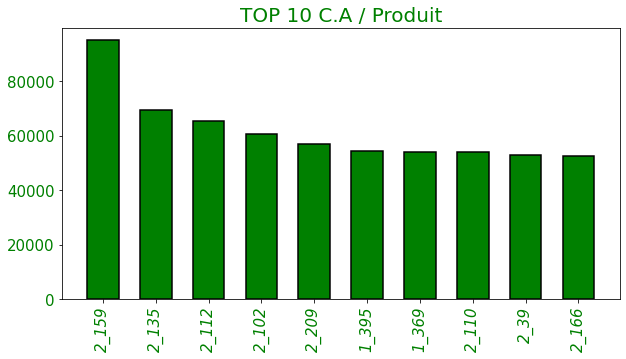

In [29]:
height = (df_top_sale['price'])
bars = (df_top_sale['id_prod'])
x_pos = np.arange(len(bars))
plt.figure(figsize=(10,5))
plt.bar(x_pos, height,  edgecolor = 'black', width = 0.6, linewidth = 1.5, color = 'green' )
plt.xticks(x_pos, bars, color = 'green', rotation=90, fontsize = 15, style = 'italic',)
plt.yticks(color = 'green', fontsize = 15)
plt.title('TOP 10 C.A / Produit', color ='green', fontsize = 20)
plt.show()

Un Produit ressort vraiment du lot (**'id_prod'** 2_159).

Maintenant regardons du coté des **FLOP** : 

In [30]:
df_flop_sale = df_ca_total_produit['price'].groupby(by = df_ca_total_produit['id_prod']).sum().sort_values(ascending = True).head(10).reset_index()
df_flop_sale

,id_prod,price
0,0_1539,0.99
1,0_1284,1.38
2,0_1653,1.98
3,0_1601,1.99
4,0_807,1.99
5,0_541,1.99
6,0_1728,2.27
7,0_1498,2.48
8,0_898,2.54
9,0_1840,2.56


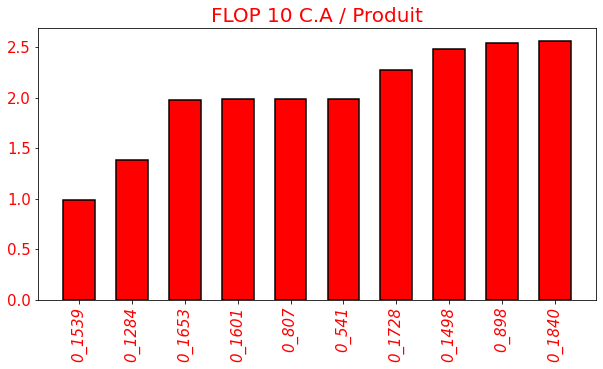

In [31]:
height = (df_flop_sale['price'])
bars = (df_flop_sale['id_prod'])
x_pos = np.arange(len(bars))
plt.figure(figsize=(10,5))
plt.bar(x_pos, height,  edgecolor = 'black', width = 0.6, linewidth = 1.5, color = 'red')
plt.xticks(x_pos, bars, color = 'red', rotation=90, fontsize = 15, style = 'italic',)
plt.yticks(color = 'red', fontsize = 15)
plt.title('FLOP 10 C.A / Produit', color ='red', fontsize = 20)
plt.show()

Concernant les **FLOP** deux produit sortent du lot ( 0_1539 et le 0_1284 )

Regardons maintenant le C.A par catégorie.

In [32]:
df_ca_categorie = df_buisness['price'].groupby(by = df_buisness['categ']).sum().reset_index()
df_ca_categorie

,categ,price
0,0,4419730.97
1,1,4653722.69
2,2,2780275.02


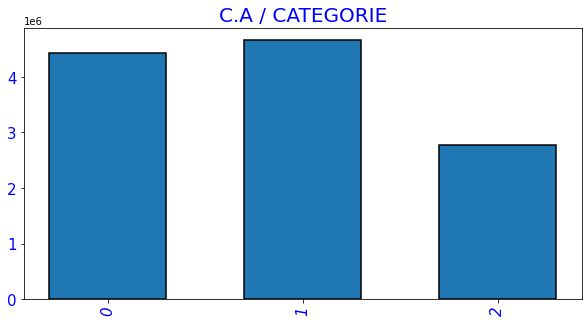

In [33]:
height = (df_ca_categorie['price'])
bars = (df_ca_categorie['categ'])
x_pos = np.arange(len(bars))
plt.figure(figsize=(10,5))
plt.bar(x_pos, height,  edgecolor = 'black', width = 0.6, linewidth = 1.5, )
plt.xticks(x_pos, bars, color = 'blue', rotation=90, fontsize = 15, style = 'italic',)
plt.yticks(color = 'blue', fontsize = 15)
plt.title('C.A / CATEGORIE', color ='blue', fontsize = 20)
plt.show()

Via ce **GRAPH BAR** ont constate très nettement que les produits de la **catégorie 2** sont en retrait au niveau du montant du chiffre d'affaire.

Ensuite regardons le chiffre d'afffaire en fonction du genre du client ( Feminin ou Masculin).<br> Pour cela il faut créer un filtre en fonction du champ **'sex'**.<br> Commencons par les dames.

In [34]:
filtre_ca_femme = df_buisness['sex'] == 'f'
df_ca_femme = df_buisness[filtre_ca_femme]
df_ca_femme

,id_prod,price,categ,client_id,sex,birth,session_id,date_exacte
0,0_1421,19.99,0,c_5152,f,1986,s_21727,2021-04-17 06:09:37.424812
1,0_1421,19.99,0,c_2167,f,1960,s_124134,2021-11-24 00:28:06.088699
2,0_1421,19.99,0,c_2167,f,1960,s_257560,2022-08-24 00:28:06.088699
6,0_1421,19.99,0,c_7946,f,1987,s_110147,2021-10-26 00:06:47.812612
7,0_1421,19.99,0,c_1934,f,2004,s_138491,2021-12-23 00:10:38.256002
...,...,...,...,...,...,...,...,...
679101,1_140,38.56,1,c_974,f,1981,s_13465,2021-03-30 11:10:45.544437
679102,1_140,38.56,1,c_974,f,1981,s_231391,2022-06-30 11:10:45.544437
679107,0_1920,25.16,0,c_7748,f,1989,s_334324,2023-01-30 02:37:22.371278
679108,0_1920,25.16,0,c_7748,f,1989,s_41465,2021-05-30 02:37:22.371278


Maintenant ont créer un **df** pour regrouper les produit et leur prix en fonction de notre filtre "feminin".

In [35]:
df_ca_total_femme = df_ca_femme['price'].groupby(by = df_ca_femme['id_prod']).sum().reset_index()
df_ca_total_femme

,id_prod,price
0,0_0,2265.00
1,0_1,3253.04
2,0_10,233.35
3,0_100,41.20
4,0_1000,1395.36
...,...,...
3172,2_95,98.99
3173,2_96,13175.25
3174,2_97,804.95
3175,2_98,149.74


Ensuite je crée une variable pour caculer le chiffre d'affaire "feminin".

In [36]:
ca_femme = (df_ca_total_femme['price']).sum()
ca_femme

5859683.13

Le C.A "Feminin" est de  **5,86 millions d'euro**.

Je reproduit la même méthodologie avec un filtre, ce coup ci , "Masculin".

In [37]:
filtre_ca_homme = df_buisness['sex'] == 'm'
df_ca_homme = df_buisness[filtre_ca_homme]
df_ca_homme

,id_prod,price,categ,client_id,sex,birth,session_id,date_exacte
3,0_1421,19.99,0,c_3060,m,1971,s_16742,2021-04-06 09:35:05.954975
4,0_1421,19.99,0,c_3060,m,1971,s_175117,2022-03-06 09:35:05.954975
5,0_1421,19.99,0,c_3060,m,1971,s_293477,2022-11-06 09:35:05.954975
9,0_1421,19.99,0,c_7200,m,1967,s_78275,2021-08-20 10:53:58.741520
10,0_1421,19.99,0,c_7200,m,1967,s_329639,2023-01-20 10:53:58.741520
...,...,...,...,...,...,...,...,...
679103,1_140,38.56,1,c_4766,m,1989,s_228920,2022-06-25 06:33:13.259886
679104,1_140,38.56,1,c_4766,m,1989,s_139663,2021-12-25 06:33:13.259886
679105,1_140,38.56,1,c_7406,m,1988,s_309513,2022-12-09 14:20:34.169187
679106,1_140,38.56,1,c_7406,m,1988,s_131828,2021-12-09 14:20:34.169187


In [38]:
df_ca_total_homme = df_ca_homme['price'].groupby(by = df_ca_homme['id_prod']).sum().reset_index()
df_ca_total_homme

,id_prod,price
0,0_0,2392.50
1,0_1,2099.09
2,0_10,161.55
3,0_100,20.60
4,0_1000,1559.52
...,...,...
3174,2_94,290.90
3175,2_95,296.97
3176,2_96,15474.93
3177,2_97,1287.92


In [39]:
ca_homme = (df_ca_total_homme['price']).sum()
ca_homme

5994045.55

Le C.A "Mascumin" est de 5,99 millions d'euro.

Pour que cela soit plus lisible, je créer un **PIE CHART**.

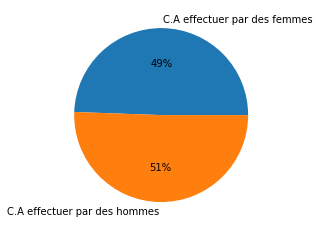

In [40]:
chiffre_affaire = [ca_femme,ca_homme]
labels = ['C.A effectuer par des femmes','C.A effectuer par des hommes']
plt.pie(chiffre_affaire,labels = labels,autopct = '%0.f%%')
plt.show()

Au vue de notre **PIE CHART** ont constat un quasi équilibre au niveau du chiffre d'afffaire par genre (49% pour le C.A dit "Feminin" et 51% pour le C.A dit "Masculin)

Pour la suite de notre anylise, la création d'un champ **'age'** est nécéssaire.<br> Pour cela nous partons de 2022 (Année actuel) et l'on soustrait l'année de naissance du client.

In [41]:
df_buisness['age'] = 2022 - df_buisness['birth']
df_buisness

,id_prod,price,categ,client_id,sex,birth,session_id,date_exacte,age
0,0_1421,19.99,0,c_5152,f,1986,s_21727,2021-04-17 06:09:37.424812,36
1,0_1421,19.99,0,c_2167,f,1960,s_124134,2021-11-24 00:28:06.088699,62
2,0_1421,19.99,0,c_2167,f,1960,s_257560,2022-08-24 00:28:06.088699,62
3,0_1421,19.99,0,c_3060,m,1971,s_16742,2021-04-06 09:35:05.954975,51
4,0_1421,19.99,0,c_3060,m,1971,s_175117,2022-03-06 09:35:05.954975,51
...,...,...,...,...,...,...,...,...,...
679106,1_140,38.56,1,c_7406,m,1988,s_131828,2021-12-09 14:20:34.169187,34
679107,0_1920,25.16,0,c_7748,f,1989,s_334324,2023-01-30 02:37:22.371278,33
679108,0_1920,25.16,0,c_7748,f,1989,s_41465,2021-05-30 02:37:22.371278,33
679109,0_1920,25.16,0,c_7748,f,1989,s_319303,2022-12-30 02:37:22.371278,33


Affichage d'un **histograme** de l'age de nos clients : 

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

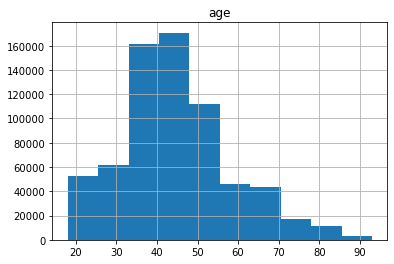

In [42]:
df_buisness.hist('age')

Via cette **histograme** nous constatons que le plus gros d nos clients ce situe dans la tranche d'age 35-50 ans.

Etablissement de la courbe de lorenz en fonction de l'age des clients et du montant des achats :

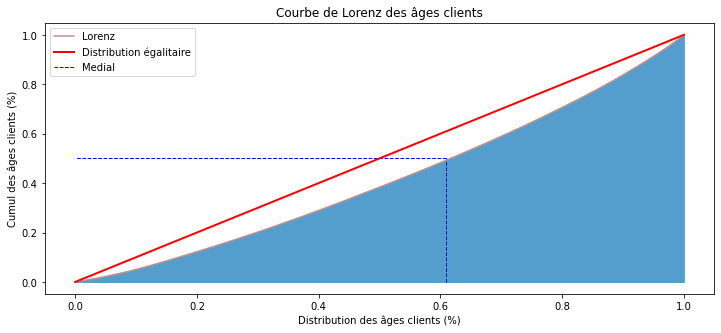

In [43]:
age = df_buisness['age'].sort_values().values
lorenz_age = np.cumsum(age) / age.sum()

plt.figure(figsize=(12,5))
plt.plot(np.linspace(0,1,len(lorenz_age)), lorenz_age, drawstyle = 'steps-post', color = 'rosybrown', label = 'Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_age)) ,lorenz_age , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw = 2, label = 'Distribution égalitaire')
plt.vlines(x = .61, ymin = 0, ymax = .5, color = 'blue', linestyle = '--', linewidth = 1, label = 'Medial')
plt.hlines(xmin = .61, xmax = 0, y = .5, color = 'blue', linestyle = '--', linewidth = 1)

plt.title('Courbe de Lorenz des âges clients')
plt.xlabel('Distribution des âges clients (%)')
plt.ylabel('Cumul des âges clients (%)')
plt.legend(loc = 'best')

plt.show()

L'établissement de la medial sur notre courbe de lorenz nous permet de constater que l'age de nos client influe sur le montant de nos achat mais pas de facon égalitaire.

Ensuite je vais regarder si des client en particuler ce dégage du point de vue C.A.<br> Pour cela un TOP 10 sera crée.

<AxesSubplot:>

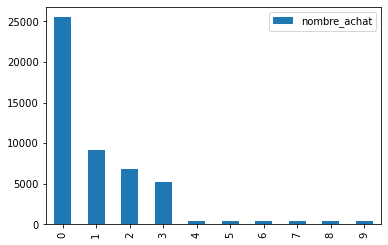

In [44]:
df_achat_client = df_buisness['client_id'].value_counts().sort_values(ascending = False).head(10).reset_index(name = 'nombre_achat').rename(columns={'index': 'client'}).plot(kind = 'bar')
df_achat_client

En analysant ce graphisque en BAR, ont voit très clairement que 4 client sortent du lot.

Maintenant, via seaborn, je vais afficher une serie temporel.

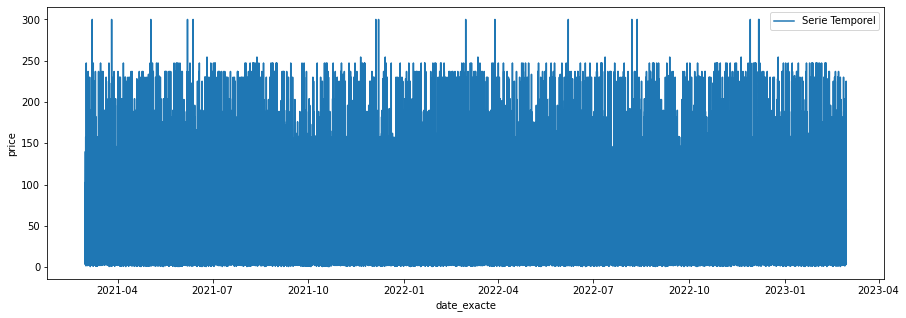

In [45]:
plt.figure (figsize = (15, 5))
sns.lineplot(x = 'date_exacte', y ='price', data = df_buisness, label = 'Serie Temporel')
plt.xlabel = ('Jour')
plt.ylabel = ('Prix')

Maintenant que notre serie temporel est créer, je créer un nouveau champ **'moyenne_mobile'** sur 30 jours.

In [46]:
df_buisness['moyenne_mobile'] = df_buisness.price.rolling(30).mean()
df_buisness

,id_prod,price,categ,client_id,sex,birth,session_id,date_exacte,age,moyenne_mobile
0,0_1421,19.99,0,c_5152,f,1986,s_21727,2021-04-17 06:09:37.424812,36,NaN
1,0_1421,19.99,0,c_2167,f,1960,s_124134,2021-11-24 00:28:06.088699,62,NaN
2,0_1421,19.99,0,c_2167,f,1960,s_257560,2022-08-24 00:28:06.088699,62,NaN
3,0_1421,19.99,0,c_3060,m,1971,s_16742,2021-04-06 09:35:05.954975,51,NaN
4,0_1421,19.99,0,c_3060,m,1971,s_175117,2022-03-06 09:35:05.954975,51,NaN
...,...,...,...,...,...,...,...,...,...,...
679106,1_140,38.56,1,c_7406,m,1988,s_131828,2021-12-09 14:20:34.169187,34,18.510667
679107,0_1920,25.16,0,c_7748,f,1989,s_334324,2023-01-30 02:37:22.371278,33,18.975333
679108,0_1920,25.16,0,c_7748,f,1989,s_41465,2021-05-30 02:37:22.371278,33,19.440000
679109,0_1920,25.16,0,c_7748,f,1989,s_319303,2022-12-30 02:37:22.371278,33,19.904667


Et maintenant je croise le tout sur un graphiques pour rendre cela plus lisible.

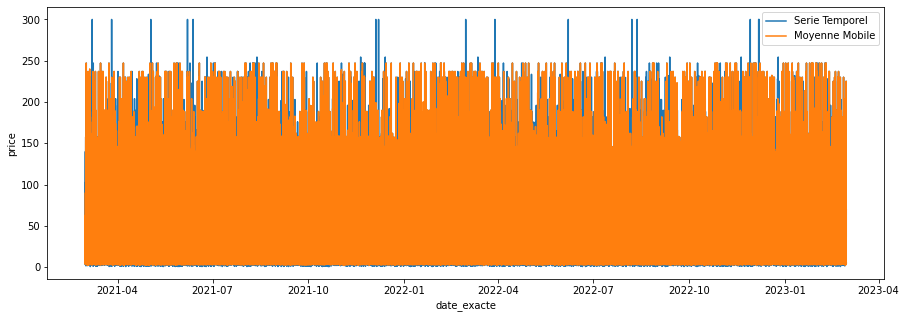

In [47]:
plt.figure (figsize = (15, 5))
sns.lineplot(x = 'date_exacte', y ='price', data = df_buisness, label = 'Serie Temporel')
sns.lineplot(x = 'date_exacte', y ='moyenne_mobile', data = df_buisness, label = 'Moyenne Mobile')
plt.xlabel = ('Jour')
plt.ylabel = ('Prix')

Grace a cela ont constate que le panier moyenne souhaitez (moyenne mobile) et très souvent dépasser.

## Analyse 2 : Analyser le lien entre le genre d’un client et les catégories des livres achetés, le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.

Importation de nouvelle librairie pour effectuer nos test : 

In [48]:
from scipy.stats import chi2_contingency as chi2_contingency
from scipy.stats import pearsonr as pearsonr
from scipy.stats import shapiro
import statsmodels.api as sm

### Affichage d'un graph bar pour la visualisation du genre du client en fonction des categorie de livre acheter :

<AxesSubplot:xlabel='categ,sex'>

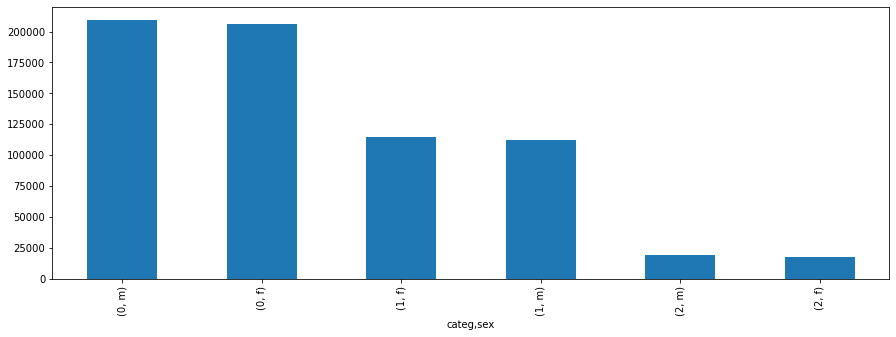

In [49]:
plt.figure(figsize=(15,5))
df_buisness.groupby(['categ'])['sex'].value_counts().plot(kind = 'bar')

Ont ne constate aucune tendance en fonction du sexe de nos clients.
Que ce soit des Hommes ou des Femmes qui achete.

Création d'un data frame pour effectuer le test ( **test de CHI2**) nécéssaire pour coroborer nos dire : 

In [50]:
df_test_categorie_sex = pd.crosstab(df_buisness['categ'],df_buisness['sex'])
df_test_categorie_sex

sex,f,m
categ,,
0,206103,209356
1,114899,112270
2,17283,19200


Test de chi2 (test de contingence) : 

In [51]:
resultat_test = chi2_contingency(df_test_categorie_sex)
resultat_test

(147.119068161315,
 1.13109805970906e-32,
 2,
 array([[206952.24759281, 208506.75240719],
        [113159.50583189, 114009.49416811],
        [ 18173.2465753 ,  18309.7534247 ]]))

Calcule de la P-Valeur : 

In [52]:
p_valeur = resultat_test[2]
p_valeur

2

L'hypothese selon laquelle les deux valeurs sont independantes peut être rejeter car inferieur a 5%

### Affichage graphique  en nuage de point pour visualiser l'age des clients en fonction de la fréquence des achats :

Pour cela création d'un nouveau data frame en appliquant un **GROUPBY** sur la champs age : 

In [53]:
FREQ_AGE = df_buisness.groupby(['age']).count().reset_index()
FREQ_AGE

,age,id_prod,price,categ,client_id,sex,birth,session_id,date_exacte,moyenne_mobile
0,18,15149,15149,15149,15149,15149,15149,15149,15149,15148
1,19,4371,4371,4371,4371,4371,4371,4371,4371,4371
2,20,4584,4584,4584,4584,4584,4584,4584,4584,4584
3,21,4252,4252,4252,4252,4252,4252,4252,4252,4252
4,22,4413,4413,4413,4413,4413,4413,4413,4413,4413
...,...,...,...,...,...,...,...,...,...,...
71,89,326,326,326,326,326,326,326,326,326
72,90,311,311,311,311,311,311,311,311,311
73,91,170,170,170,170,170,170,170,170,170
74,92,226,226,226,226,226,226,226,226,226


Maintenant regroupement des champs 'age' et 'session id' sur un df spécifique : 

In [54]:
df_FREQ_AGE = FREQ_AGE[['age','session_id']]
df_FREQ_AGE

,age,session_id
0,18,15149
1,19,4371
2,20,4584
3,21,4252
4,22,4413
...,...,...
71,89,326
72,90,311
73,91,170
74,92,226


Création d'un nouveau champ 'fréquence' pour afficher le calcule de la fréquence nécéssaire à la création de notre graphique : 

In [55]:
df_FREQ_AGE['frequence'] = df_FREQ_AGE['session_id']/sum(df_FREQ_AGE['session_id'])
df_FREQ_AGE

/var/folders/fn/5_y1xsb152l905mlpsddq_t80000gn/T/ipykernel_706/3857703723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FREQ_AGE['frequence'] = df_FREQ_AGE['session_id']/sum(df_FREQ_AGE['session_id'])


,age,session_id,frequence
0,18,15149,0.022307
1,19,4371,0.006436
2,20,4584,0.006750
3,21,4252,0.006261
4,22,4413,0.006498
...,...,...,...
71,89,326,0.000480
72,90,311,0.000458
73,91,170,0.000250
74,92,226,0.000333


Initialisation du graphique en nuage de points : 

<function matplotlib.pyplot.show(close=None, block=None)>

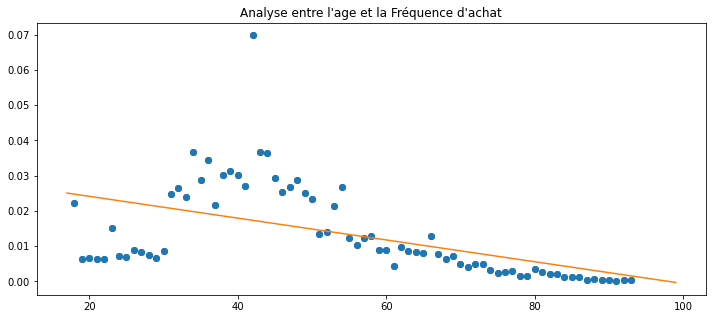

In [56]:
plt.figure(figsize=(12,5))

plt.scatter(df_FREQ_AGE['age'],df_FREQ_AGE['frequence'])

X = df_FREQ_AGE[['age']]
Y = df_FREQ_AGE['frequence']
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']

plt.plot(df_FREQ_AGE.age,df_FREQ_AGE.frequence, "o")
plt.plot(np.arange(17,100),[a*x+b for x in np.arange(17,100)]);
plt.title("Analyse entre l'age et la Fréquence d'achat")
plt.xlabel = ('Age')
plt.ylabel = ('frequence')
plt.show

Au vu d ce graphiques aucune tendance ne peut etre donnée, l'age ne prédit pas la fréquence d'achat de nos clients.

Vérification de cette analyse via le test de **PEARSON** :

In [57]:
corr, _ = pearsonr(df_FREQ_AGE['age'], df_FREQ_AGE['frequence'])
print('correlation de Pearsons : %.3f' % corr)

correlation de Pearsons : -0.534


Le test de Pearson confirme nos dire avec une association négative des deux variables (Résultat test compris en -1 et 1)

### Affichage d'un graphiques en nuage de point pour visualiser l'age des clients en fonction du montant du panier: 

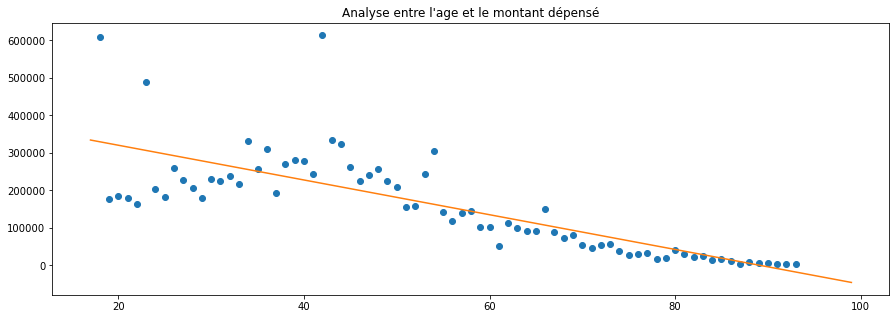

In [58]:
plt.figure(figsize=(15,5))

CA_AGE = df_buisness.groupby('age',as_index=False)['price'].sum()

X = CA_AGE[['age']]
Y = CA_AGE['price']
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']

plt.plot(CA_AGE.age,CA_AGE.price, "o")
plt.plot(np.arange(17,100),[a*x+b for x in np.arange(17,100)]);
plt.title("Analyse entre l'age et le montant dépensé")
plt.xlabel = ('Age')
plt.ylabel = ('Montant')

Nous constatons via ce graphiques que l'age des clients n'influe pas non plus sur le montant dépensé.
Pour le vérrifier nous appliquons de nouveau le Test de Pearson : 

In [59]:
corr, _ = pearsonr(CA_AGE['age'], CA_AGE['price'])
print('correlation de Pearsons : %.3f' % corr)

correlation de Pearsons : -0.779


Le résultat confirme l'analyse avec une association négative entre les deux variables très forte.

### Affichage d'un graphiques en nuage de point pour visualiser l'age des clients en fonction du montant du panier moyen : 

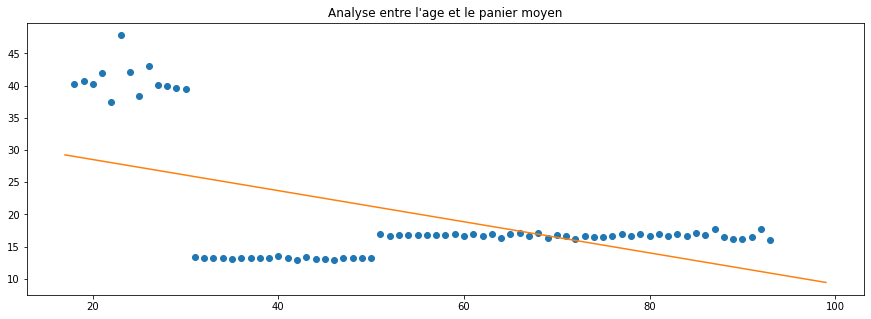

In [60]:
plt.figure(figsize=(15,5))

PM_AGE = df_buisness.groupby('age',as_index=False)['price'].mean()

X = PM_AGE[['age']]
Y = PM_AGE['price']
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']

plt.plot(PM_AGE.age,PM_AGE.price, "o")
plt.plot(np.arange(17,100),[a*x+b for x in np.arange(17,100)]);
plt.title("Analyse entre l'age et le panier moyen")
plt.xlabel = ('Age')
plt.ylabel = ('Montant')

De même l'age ne joue pas sur le montant du panier moyen.

In [61]:
corr, _ = pearsonr(PM_AGE['age'], PM_AGE['price'])
print('correlation de Pearsons : %.3f' % corr)

correlation de Pearsons : -0.548


Résultat test de Pearson : association négative entre les deux variables forte.

### Affichage graphique en bar pour la visualisation de l'age des clients en fonction des categorie de livre acheter :

In [62]:
CATEG_AGE = df_buisness.groupby(['age','categ']).count().reset_index()
CATEG_AGE

,age,categ,id_prod,price,client_id,sex,birth,session_id,date_exacte,moyenne_mobile
0,18,0,3418,3418,3418,3418,3418,3418,3418,3417
1,18,1,5719,5719,5719,5719,5719,5719,5719,5719
2,18,2,6012,6012,6012,6012,6012,6012,6012,6012
3,19,0,909,909,909,909,909,909,909,909
4,19,1,1678,1678,1678,1678,1678,1678,1678,1678
...,...,...,...,...,...,...,...,...,...,...
223,92,1,149,149,149,149,149,149,149,149
224,92,2,2,2,2,2,2,2,2,2
225,93,0,78,78,78,78,78,78,78,78
226,93,1,122,122,122,122,122,122,122,122


On renomme 'session_id' pour mettre le nombre d'occurence pour plus de cohérence

In [63]:
CATEG_AGE = CATEG_AGE[['age', 'categ', 'session_id']]
CATEG_AGE.rename(columns={"session_id": "nombre"},inplace=True)
CATEG_AGE

/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,age,categ,nombre
0,18,0,3418
1,18,1,5719
2,18,2,6012
3,19,0,909
4,19,1,1678
...,...,...,...
223,92,1,149
224,92,2,2
225,93,0,78
226,93,1,122


Etant donné que l'ont à plusieurs ages, il faudrait découper et créer des classes d'age : <br> Nous allons pour cela faire 10 intervalles

In [64]:
CATEG_AGE['age']= pd.cut(CATEG_AGE['age'], 10)
CATEG_AGE

/var/folders/fn/5_y1xsb152l905mlpsddq_t80000gn/T/ipykernel_706/3387120080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CATEG_AGE['age']= pd.cut(CATEG_AGE['age'], 10)


,age,categ,nombre
0,"(17.925, 25.5]",0,3418
1,"(17.925, 25.5]",1,5719
2,"(17.925, 25.5]",2,6012
3,"(17.925, 25.5]",0,909
4,"(17.925, 25.5]",1,1678
...,...,...,...
223,"(85.5, 93.0]",1,149
224,"(85.5, 93.0]",2,2
225,"(85.5, 93.0]",0,78
226,"(85.5, 93.0]",1,122


Ainsi nous allons à nouveau faire la somme des occurences aprés découpage en intervalle.

In [65]:
CATEG_AGE=CATEG_AGE.groupby(['age','categ']).sum().reset_index()
CATEG_AGE

,age,categ,nombre
0,"(17.925, 25.5]",0,10849
1,"(17.925, 25.5]",1,19687
2,"(17.925, 25.5]",2,22072
3,"(25.5, 33.0]",0,44964
4,"(25.5, 33.0]",1,22000
5,"(25.5, 33.0]",2,11331
6,"(33.0, 40.5]",0,110235
7,"(33.0, 40.5]",1,34301
8,"(33.0, 40.5]",2,527
9,"(40.5, 48.0]",0,145354


Création du graphique en bar :

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1080x360 with 0 Axes>

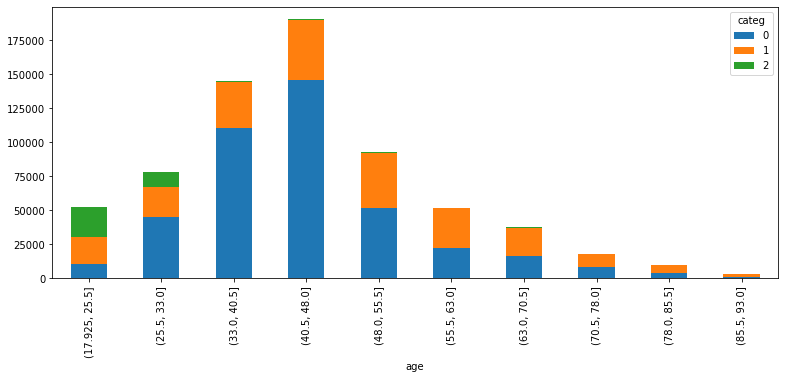

In [66]:
plt.figure(figsize = (15,5))
CATEG_AGE.pivot_table( values = 'nombre',index = 'age',columns = 'categ').plot(kind = 'bar',stacked = True,figsize = (13,5))
plt.xlabel = ('Age')
plt.ylabel = ('Nombre de produits vendus')
plt.title = ("Catégories produits selon les classes d'âge des clients")
plt.show

On réalise un test de **student** pour voir la corrélation entre les variables :

In [67]:
from scipy import stats 
t_stat, p=stats.ttest_ind(df_buisness['age'], df_buisness['categ'])
print(f'test_statistique={t_stat}, p_valeur={p}')

test_statistique=2653.0746755328355, p_valeur=0.0
